In [2]:
package 'SanityCheck' {
    part A;
    part B;
    connect A to B;
}

Package SanityCheck (4a08f91e-e981-4261-b773-d4f7d66ca26d)


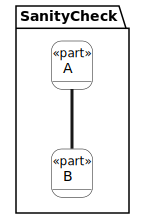

In [4]:
%viz SanityCheck

In [9]:
package 'EnduroBikeTelemetry' {
    // 1. Define the components (Definitions)
    part def Battery;
    part def Microcontroller;
    part def IMU_Sensor;
    part def GPS;

    // 2. Build the System (Usage)
    part TelemetrySystem {
        // Instantiate the parts
        part batt : Battery;
        part mcu : Microcontroller;
        part frontForkSensor : IMU_Sensor;
        part rearShockSensor : IMU_Sensor;
        part tracker : GPS;

        // 3. Connect them (Basic connections)
        connect batt to mcu;
        connect mcu to frontForkSensor;
        connect mcu to rearShockSensor;
        connect mcu to tracker;
    }
}

// 4. Visualize
//%viz EnduroBikeTelemetry

Package EnduroBikeTelemetry (76137208-cab7-400f-9a64-84ffcae574db)


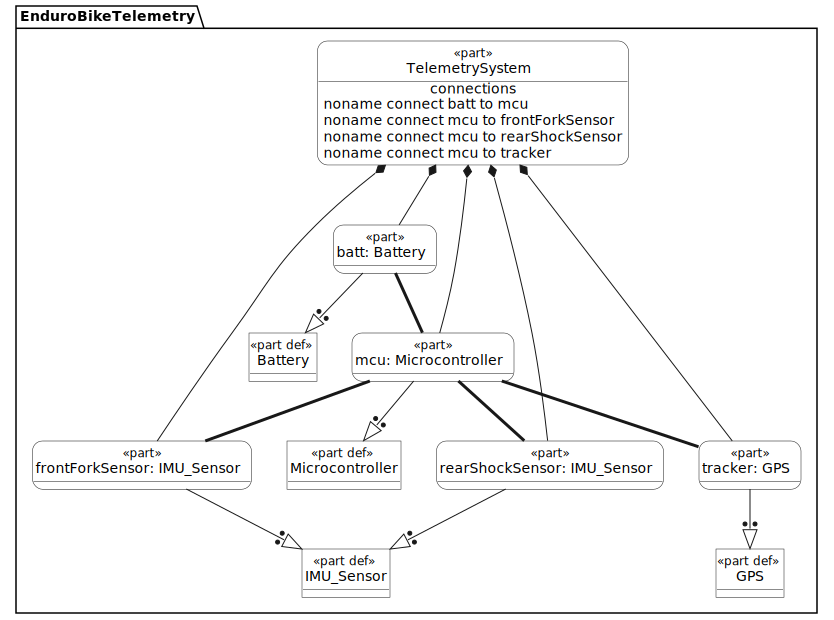

In [11]:
%viz EnduroBikeTelemetry

In [ ]:
package 'Enduro Bike Telemetry Detailed' {

    // --------------------------------------------------------
    // 1. Define Standard Interfaces (The "Protocol")
    // --------------------------------------------------------
    interface def PowerInterface {
        // We can add flow properties later (e.g., voltage)
    }

    interface def DataInterface {
        // e.g., SPI, I2C, UART
    }

    // --------------------------------------------------------
    // 2. Define Ports (The "Plugs")
    // --------------------------------------------------------
    port def PowerPort {
        attribute voltage : Real;
    }

    port def DataPort;

    // --------------------------------------------------------
    // 3. Define Parts with Ports (The Components)
    // --------------------------------------------------------
    part def Battery {
        port pwrOut : PowerPort {
            :>> voltage = 12.0;
        }
    }

    part def Microcontroller {
        port pwrIn : PowerPort;
        port spiBus : DataPort;
        port i2cBus : DataPort;
    }

    part def IMU_Sensor {
        port pwrIn : PowerPort;
        port dataOut : DataPort;
    }

    // --------------------------------------------------------
    // 4. Assemble the System
    // --------------------------------------------------------
    part TelemetrySystem {
        part batt : Battery;
        part mcu : Microcontroller;
        part frontFork : IMU_Sensor;
        part rearShock : IMU_Sensor;

        // Power Connections
        connect batt.pwrOut to mcu.pwrIn;
        connect batt.pwrOut to frontFork.pwrIn;
        connect batt.pwrOut to rearShock.pwrIn;

        // Data Connections (Specific Protocols)
        connect mcu.spiBus to frontFork.dataOut;
        connect mcu.i2cBus to rearShock.dataOut;
    }
}

//%viz 'Enduro Bike Telemetry Detailed'

ERROR:Couldn't resolve reference to Type 'Real'. (13.sysml line : 18 column : 29)
ERROR:Must have at least two related elements (13.sysml line : 6 column : 5)
ERROR:Must have at least two related elements (13.sysml line : 10 column : 5)
ERROR:An attribute must be typed by attribute definitions. (13.sysml line : 18 column : 9)
ERROR:A usage must be typed by definitions. (13.sysml line : 28 column : 13)


In [ ]:
package 'Enduro Bike Telemetry Detailed' {
    // FIX 1: Import the standard library to use 'Real', 'Integer', etc.
    import ScalarValues::*;

    // FIX 2: Removed empty 'interface defs' that were causing the "related elements" error.
    // We will stick to simple Ports for now.

    // --------------------------------------------------------
    // 1. Define Ports (The "Plugs")
    // --------------------------------------------------------
    port def PowerPort {
        // Now 'Real' works because we imported ScalarValues
        attribute voltage : Real;
    }

    port def DataPort;

    // --------------------------------------------------------
    // 2. Define Parts with Ports
    // --------------------------------------------------------
    part def Battery {
        port pwrOut : PowerPort {
            // We assign a default value to the attribute
            :>> voltage = 12.0;
        }
    }

    part def Microcontroller {
        port pwrIn : PowerPort;
        port spiBus : DataPort;
        port i2cBus : DataPort;
    }

    part def IMU_Sensor {
        port pwrIn : PowerPort;
        port dataOut : DataPort;
    }

    // --------------------------------------------------------
    // 3. Assemble the System
    // --------------------------------------------------------
    part TelemetrySystem {
        part batt : Battery;
        part mcu : Microcontroller;
        part frontFork : IMU_Sensor;
        part rearShock : IMU_Sensor;

        // Power Connections
        // These connect the *ports* (squares), not the main blocks
        connect batt.pwrOut to mcu.pwrIn;
        connect batt.pwrOut to frontFork.pwrIn;
        connect batt.pwrOut to rearShock.pwrIn;

        // Data Connections
        connect mcu.spiBus to frontFork.dataOut;
        connect mcu.i2cBus to rearShock.dataOut;
    }
}

ERROR:mismatched input 'import' expecting '}' (15.sysml line : 3 column : 5)
ERROR:no viable alternative at input '::' (15.sysml line : 3 column : 24)
ERROR:extraneous input '}' expecting EOF (15.sysml line : 58 column : 1)


In [ ]:
// 1. Import comes FIRST
import ScalarValues::*;

package 'Enduro Bike Telemetry Detailed' {

    // --------------------------------------------------------
    // 2. Define Ports
    // --------------------------------------------------------
    port def PowerPort {
        // 'Real' works now because import is global to this file
        attribute voltage : Real;
    }

    port def DataPort;

    // --------------------------------------------------------
    // 3. Define Parts
    // --------------------------------------------------------
    part def Battery {
        port pwrOut : PowerPort {
            // Default value assignment
            :>> voltage = 12.0;
        }
    }

    part def Microcontroller {
        port pwrIn : PowerPort;
        port spiBus : DataPort;
        port i2cBus : DataPort;
    }

    part def IMU_Sensor {
        port pwrIn : PowerPort;
        port dataOut : DataPort;
    }

    // --------------------------------------------------------
    // 4. Assemble the System
    // --------------------------------------------------------
    part TelemetrySystem {
        part batt : Battery;
        part mcu : Microcontroller;
        part frontFork : IMU_Sensor;
        part rearShock : IMU_Sensor;

        // Power Connections (Port to Port)
        connect batt.pwrOut to mcu.pwrIn;
        connect batt.pwrOut to frontFork.pwrIn;
        connect batt.pwrOut to rearShock.pwrIn;

        // Data Connections
        connect mcu.spiBus to frontFork.dataOut;
        connect mcu.i2cBus to rearShock.dataOut;
    }
}

ERROR:missing EOF at 'import' (17.sysml line : 2 column : 1)


In [ ]:
package 'EnduroBikeTelemetryDetailed' {

    // --------------------------------------------------------
    // 1. Define Ports (The "Plugs")
    // --------------------------------------------------------
    port def PowerPort {
        // FIX: Point directly to the library instead of importing
        attribute voltage : ScalarValues::Real;
    }

    port def DataPort;

    // --------------------------------------------------------
    // 2. Define Parts
    // --------------------------------------------------------
    part def Battery {
        port pwrOut : PowerPort {
            // Assign value (Note: The type is inferred from the definition)
            :>> voltage = 12.0;
        }
    }

    part def Microcontroller {
        port pwrIn : PowerPort;
        port spiBus : DataPort;
        port i2cBus : DataPort;
    }

    part def IMU_Sensor {
        port pwrIn : PowerPort;
        port dataOut : DataPort;
    }

    // --------------------------------------------------------
    // 3. Assemble the System
    // --------------------------------------------------------
    part TelemetrySystem {
        part batt : Battery;
        part mcu : Microcontroller;
        part frontFork : IMU_Sensor;
        part rearShock : IMU_Sensor;

        // Power Connections
        connect batt.pwrOut to mcu.pwrIn;
        connect batt.pwrOut to frontFork.pwrIn;
        connect batt.pwrOut to rearShock.pwrIn;

        // Data Connections
        connect mcu.spiBus to frontFork.dataOut;
        connect mcu.i2cBus to rearShock.dataOut;
    }
}

Package EnduroBikeTelemetryDetailed (78046848-3746-4cc6-900f-1e7cf956e5f7)


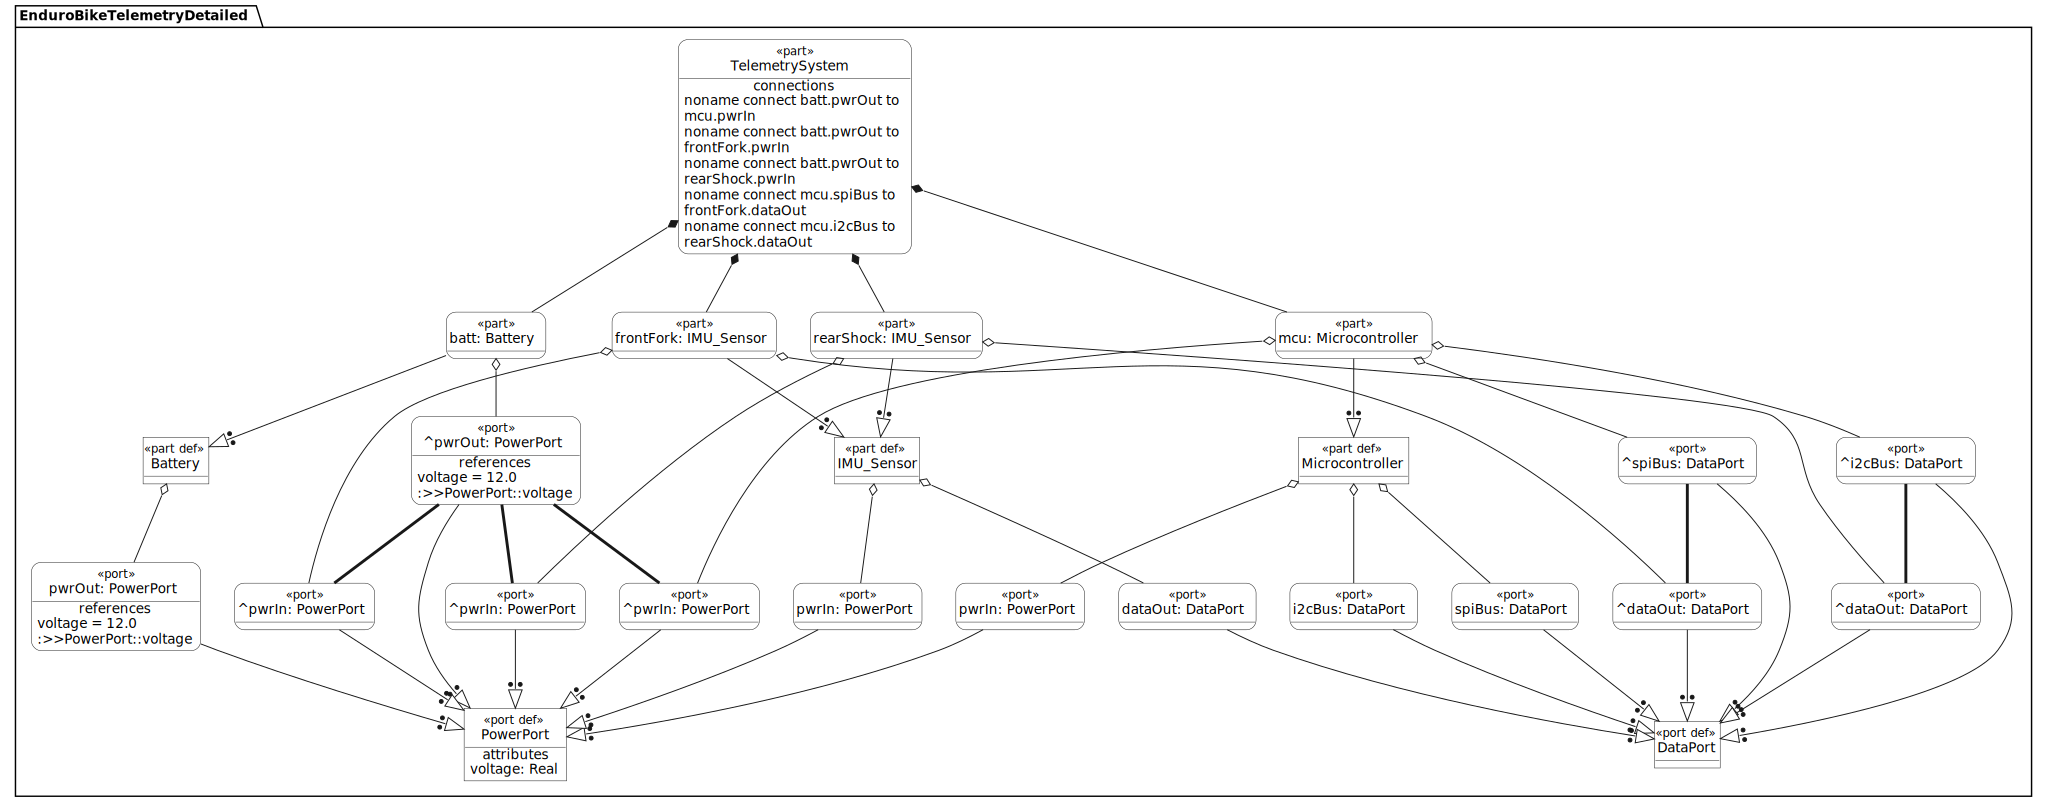

In [23]:
%viz 'EnduroBikeTelemetryDetailed'

In [ ]:
import ScalarValues::*;

package EnduroBikeTelemetryDetailed {

    // 1. Define physical signals (The "Wires")
    attribute def Voltage; // Simple tag

    // 2. Define the Protocols (Interface Definitions)
    interface def SPI_Interface {
        // Ports can contain other ports (Nested integration)
        port mosi; // Master Out
        port miso; // Master In
        port sclk; // Clock
        port cs;   // Chip Select
    }

    interface def I2C_Interface {
        port sda;
        port scl;
    }

    // 3. Define the Component Ports using those Interfaces
    port def PowerPort {
        attribute v_level : Real;
    }

    // 4. Update Components to use specific protocols
    part def Microcontroller {
        port pwrIn : PowerPort;

        // This port is no longer generic; it is strictly SPI
        port spiBus : SPI_Interface;
        port i2cBus : I2C_Interface;
    }

    part def IMU_Sensor {
        port pwrIn : PowerPort;
        // The sensor demands an SPI connection
        port dataOut : SPI_Interface;
    }

    part TelemetrySystem {
        part mcu : Microcontroller;
        part frontFork : IMU_Sensor;

        // 5. Connect specific interfaces
        // SysML checks if 'spiBus' and 'dataOut' are compatible types
        connect mcu.spiBus to frontFork.dataOut;
    }
}

ERROR:missing EOF at 'import' (25.sysml line : 1 column : 1)


In [ ]:
package EnduroBikeTelemetryDetailed {

    // 1. Define physical signals (The "Wires")
    attribute def Voltage;

    // 2. Define the Protocols (Interface Definitions)
    interface def SPI_Interface {
        // Ports can contain other ports (Nested integration)
        port mosi; // Master Out
        port miso; // Master In
        port sclk; // Clock
        port cs;   // Chip Select
    }

    interface def I2C_Interface {
        port sda;
        port scl;
    }

    // 3. Define the Component Ports using those Interfaces
    port def PowerPort {
        // FIX: Use the full path instead of import
        attribute v_level : ScalarValues::Real;
    }

    // 4. Update Components to use specific protocols
    part def Microcontroller {
        port pwrIn : PowerPort;

        // This port is no longer generic; it is strictly SPI
        port spiBus : SPI_Interface;
        port i2cBus : I2C_Interface;
    }

    part def IMU_Sensor {
        port pwrIn : PowerPort;
        // The sensor demands an SPI connection
        port dataOut : SPI_Interface;
    }

    part TelemetrySystem {
        part mcu : Microcontroller;
        part frontFork : IMU_Sensor;

        // 5. Connect specific interfaces
        // SysML checks if 'spiBus' and 'dataOut' are compatible types
        connect mcu.spiBus to frontFork.dataOut;
    }
}

ERROR:Must have at least two related elements (27.sysml line : 7 column : 5)
ERROR:Must have at least two related elements (27.sysml line : 15 column : 5)
ERROR:A port must be typed by port definitions. (27.sysml line : 31 column : 9)
ERROR:A port must be typed by port definitions. (27.sysml line : 32 column : 9)
ERROR:A port must be typed by port definitions. (27.sysml line : 38 column : 9)


In [ ]:
package EnduroBikeTelemetryDetailed {

    // 1. Define standard types locally to avoid import errors
    attribute def Voltage;

    // 2. Define the "Bundles" (Complex Ports)
    // FIX: Changed from 'interface def' to 'port def'
    // This allows us to use it as a type for a component's port.
    port def SPI_Port {
        port mosi; // Master Out
        port miso; // Master In
        port sclk; // Clock
        port cs;   // Chip Select
    }

    port def I2C_Port {
        port sda;
        port scl;
    }

    port def PowerPort {
        attribute v_level : ScalarValues::Real;
    }

    // 3. Define Components using these Complex Ports
    part def Microcontroller {
        port pwrIn : PowerPort;

        // FIX: Now typed by a 'port def', so this works
        port spiBus : SPI_Port;
        port i2cBus : I2C_Port;
    }

    part def IMU_Sensor {
        port pwrIn : PowerPort;
        port dataOut : SPI_Port;
    }

    // 4. Assemble the System
    part TelemetrySystem {
        part mcu : Microcontroller;
        part frontFork : IMU_Sensor;

        // Connect the complex ports
        connect mcu.spiBus to frontFork.dataOut;
    }
}

Package EnduroBikeTelemetryDetailed (a3a906fd-fa45-4145-8691-076d90ef8051)


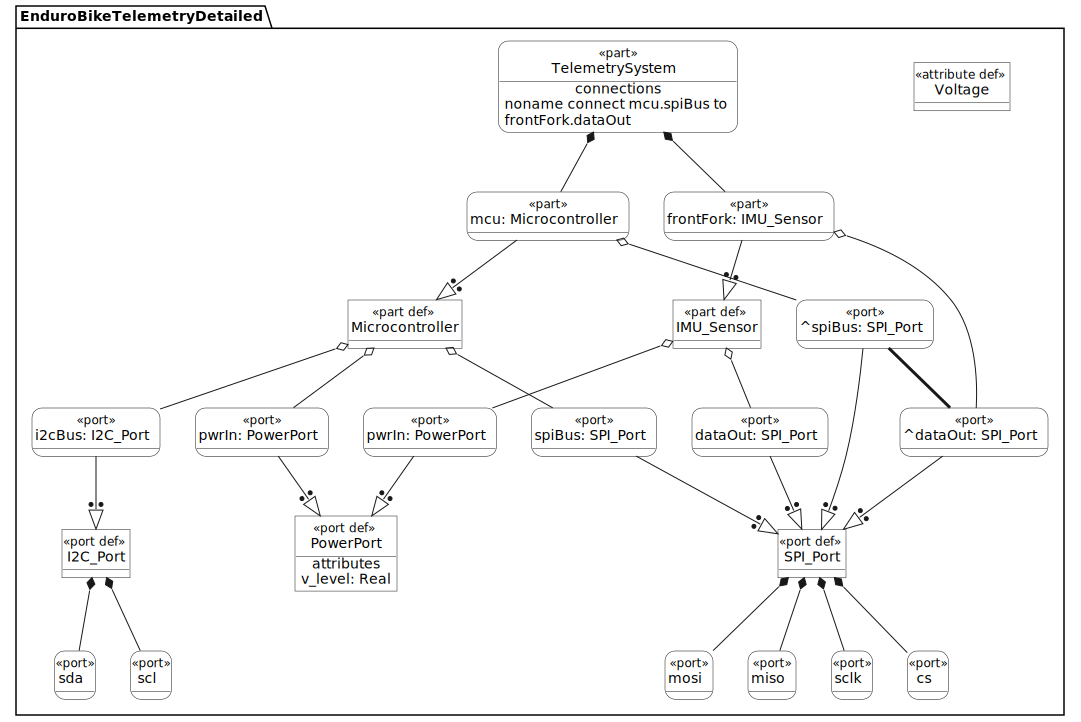

In [31]:
%viz EnduroBikeTelemetryDetailed

In [ ]:
package EnduroBikeBehavior {

    // 1. Define the State Machine (The "Firmware Logic")
    state def FirmwareBehavior {
        // Entry point
        entry; then Idle;

        // --- States ---
        state Idle;
        state Sampling;
        state Transmitting;

        // --- Transitions ---
        // 1. Wake up on timer to start sampling
        transition WakeUp
            first Idle
            accept at 100 // 100ms timer
            then Sampling;

        // 2. When sampling is done, transmit
        transition SampleComplete
            first Sampling
            then Transmitting;

        // 3. Go back to sleep
        transition TxComplete
            first Transmitting
            then Idle;
    }

    // 2. Attach it to the Component
    part def Microcontroller {
        // The MCU "exhibits" this behavior
        exhibit firmware : FirmwareBehavior;
    }
}

ERROR:Couldn't resolve reference to Feature 'firmware'. (33.sysml line : 34 column : 17)
ERROR:An at expression must be a TimeInstantValue. (33.sysml line : 17 column : 20)
ERROR:Must reference a state. (33.sysml line : 34 column : 17)


In [ ]:
package EnduroBikeBehavior {

    // 1. Define a "Trigger" (Signal)
    // We use this instead of raw time to avoid import errors
    attribute def Timeout;

    // 2. Define the State Machine
    state def FirmwareBehavior {

        // Initial entry point
        entry; then Idle;

        // --- States ---
        state Idle;
        state Sampling;
        state Transmitting;

        // --- Transitions ---

        transition WakeUp {
            from Idle;
            to Sampling;
            // Triggered by our signal
            accept Timeout;
        }

        transition SampleComplete {
            from Sampling;
            to Transmitting;
            accept Timeout;
        }

        transition TxComplete {
            from Transmitting;
            to Idle;
            accept Timeout;
        }
    }

    // 3. Attach it to the Component
    part def Microcontroller {
        // Now this should work because the state def above is valid
        exhibit firmwareBehavior : FirmwareBehavior;
    }
}

ERROR:no viable alternative at input 'transition' (35.sysml line : 20 column : 9)
ERROR:missing '}' at 'WakeUp' (35.sysml line : 20 column : 20)
ERROR:mismatched input 'from' expecting '}' (35.sysml line : 21 column : 13)
ERROR:mismatched input 'to' expecting '}' (35.sysml line : 22 column : 13)
ERROR:missing EOF at 'accept' (35.sysml line : 24 column : 13)


In [ ]:
package EnduroBikeBehavior {

    // 1. Define the Trigger
    attribute def Timeout;

    // 2. Define the State Machine
    state def FirmwareBehavior {

        // Start immediately at Idle
        entry; then Idle;

        // --- States ---
        state Idle;
        state Sampling;
        state Transmitting;

        // --- Transitions (Linear Syntax) ---
        // "First [State], Accept [Trigger], Then [Next State]"

        transition WakeUp first Idle accept Timeout then Sampling;

        transition SampleComplete first Sampling accept Timeout then Transmitting;

        transition TxComplete first Transmitting accept Timeout then Idle;
    }

    // 3. Attach to Component
    part def Microcontroller {
        exhibit firmwareBehavior : FirmwareBehavior;
    }
}

ERROR:Couldn't resolve reference to Feature 'firmwareBehavior'. (37.sysml line : 29 column : 17)
ERROR:Must reference a state. (37.sysml line : 29 column : 17)


In [ ]:
package EnduroBikeBehavior {

    // 1. Define Trigger
    attribute def Timeout;

    // 2. Define Component with Nested Behavior
    part def Microcontroller {

        // --- Nested State Machine ---
        // We define it AND exhibit it right here
        exhibit state firmwareBehavior {

            // Start
            entry; then Idle;

            // States
            state Idle;
            state Sampling;
            state Transmitting;

            // Transitions (Linear Syntax)
            transition WakeUp first Idle accept Timeout then Sampling;
            transition SampleComplete first Sampling accept Timeout then Transmitting;
            transition TxComplete first Transmitting accept Timeout then Idle;
        }
    }
}

Package EnduroBikeBehavior (d5404158-c0ce-41cf-8db7-137a8b735317)


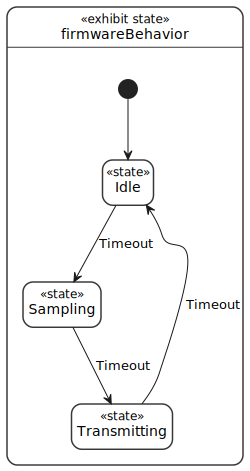

In [40]:
// Visualize the behavior INSIDE the microcontroller definition
%viz EnduroBikeBehavior::Microcontroller::firmwareBehavior